In [6]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_csv("data/final_data/nfl_stats_long_format.csv") 

df_filtered = df.copy()

categorical_variables = [
    "Player Name", "Age","Season","Position","Team"
]

vif_columns = [
    "Games Played","Games Started","Passing Attempts",
    "Passing Completions","Passing Yards","Passing Touchdowns","Interceptions Thrown","Rushing Attempts",
    "Rushing Yards","Rushing Touchdowns","Targets","Receptions","Receiving Yards","Receiving Touchdowns",
    "Fumbles","Field Goals Attempted 0-39","Field Goals Made 0-39","Field Goals Attempted 40-49",
    "Field Goals Made 40-49","Field Goals Attempted 50+","Field Goals Made 50+","Field Goals Attempted",
    "Field Goals Made","Extra Points Attempted","Extra Points Made","Total Yards Allowed","Total Plays","Takeaways",
    "First Downs Allowed","Passing Yards Allowed","Passing Touchdowns Allowed","Rushing Yards Allowed",
    "Rushing Touchdowns Allowed","Penalties Committed","Penalty Yards","First Downs by Penalty",
    "Percent Drives Scored On","Percent Drives Takeaway","ST_Sacks","ST_Interceptions","ST_Fumble Recoveries",
    "ST_Forced Fumbles","ST_Safeties","ST_Special Teams Touchdowns","Fantasy Points From Points","XP2","ESPN ADP",
    "Sleeper ADP","NFL ADP","RTSports ADP","Average ADP","Positional ADP","PPR Fantasy Points Scored","Standard Fantasy Points Scored"
]

df_filtered[vif_columns] = df_filtered[vif_columns].fillna(0)

X = df_filtered[vif_columns]
X = sm.add_constant(X)  

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


/opt/homebrew/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                           Feature           VIF
0                            const  8.766236e+00
1                     Games Played  1.579445e+00
2                    Games Started  5.050248e+00
3                 Passing Attempts  4.716813e+02
4              Passing Completions  5.368978e+02
5                    Passing Yards  1.551612e+04
6               Passing Touchdowns  6.934476e+03
7             Interceptions Thrown  3.830504e+02
8                 Rushing Attempts  3.507180e+01
9                    Rushing Yards  8.706062e+03
10              Rushing Touchdowns  2.492141e+03
11                         Targets  6.387811e+01
12                      Receptions  3.155282e+06
13                 Receiving Yards  1.422475e+04
14            Receiving Touchdowns  2.768135e+03
15                         Fumbles  2.307332e+02
16      Field Goals Attempted 0-39           inf
17           Field Goals Made 0-39           inf
18     Field Goals Attempted 40-49           inf
19          Field Go

In [21]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_csv("data/final_data/nfl_stats_long_format.csv") 

df_filtered = df.copy()

df_filtered['Yards per Completion'] = df['Passing Yards'] / df['Passing Completions']
df_filtered["Attempts per Completion"] = np.where(
    df_filtered["Passing Attempts"] > 0,
    df_filtered["Passing Completions"] / df_filtered["Passing Attempts"],
    np.nan)

df_filtered["Yards per Passing Touchdown"] = np.where(
    df_filtered["Passing Touchdowns"] > 0,
    df_filtered["Passing Yards"] / df_filtered["Passing Touchdowns"],
    np.nan)

df_filtered["Yards per Carry"] = np.where(
    df_filtered["Rushing Attempts"] > 0,
    df_filtered["Rushing Yards"] / df_filtered["Rushing Attempts"],
    np.nan)

df_filtered["Yards per Reception"] = np.where(
    df_filtered["Receptions"] > 0,
    df_filtered["Receiving Yards"] / df_filtered["Receptions"],
    np.nan)

df_filtered["Yards per Receiving Touchdown"] = np.where(
    df_filtered["Receiving Touchdowns"] > 0,
    df_filtered["Receiving Yards"] / df_filtered["Receiving Touchdowns"],
    np.nan)

df_filtered["Catch Percentage"] = np.where(
    df_filtered["Receptions"] > 0,
    df_filtered["Receptions"] / df_filtered["Targets"],
    np.nan)

df_filtered["Yards per Rushing Touchdown"] = np.where(
    df_filtered["Rushing Touchdowns"] > 0,
    df_filtered["Rushing Yards"] / df_filtered["Rushing Touchdowns"],
    np.nan)

df_filtered['Total Touchdowns Allowed'] = df_filtered['Passing Touchdowns Allowed'] + df_filtered['Rushing Touchdowns Allowed']

df_filtered['Special Teams Impact'] = df_filtered['ST_Sacks'] + df_filtered['ST_Interceptions'] + df_filtered['ST_Fumble Recoveries'] + df_filtered['ST_Forced Fumbles']

df_filtered['Field Goal Percentage'] = df_filtered['Field Goals Made'] / df_filtered['Field Goals Attempted']

vif_columns = [
    "Games Played","Games Started","Yards per Completion", "Yards per Passing Touchdown", "Attempts per Completion",
    "Passing Touchdowns", "Interceptions Thrown", "Rushing Attempts", "Yards per Rushing Touchdown",
    "Yards per Carry", "Rushing Touchdowns", "Targets", 'Yards per Reception', 'Yards per Receiving Touchdown',
    "Catch Percentage", "Receiving Touchdowns", "Fumbles", "Field Goals Made", "Field Goal Percentage",
    "Total Touchdowns Allowed","Special Teams Impact","ST_Safeties",
    "ST_Special Teams Touchdowns","XP2","Average ADP","Positional ADP",
]

df_filtered[vif_columns] = df_filtered[vif_columns].fillna(0)

X = df_filtered[vif_columns]
X = sm.add_constant(X)  

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                          Feature        VIF
0                           const  13.781050
1                    Games Played   1.676166
2                   Games Started   4.970366
3            Yards per Completion   3.639433
4     Yards per Passing Touchdown   2.584559
5         Attempts per Completion   4.584362
6              Passing Touchdowns   4.882244
7            Interceptions Thrown   5.885854
8                Rushing Attempts   7.731118
9     Yards per Rushing Touchdown   2.395523
10                Yards per Carry   1.212005
11             Rushing Touchdowns   4.986969
12                        Targets   6.860523
13            Yards per Reception   2.145989
14  Yards per Receiving Touchdown   2.062610
15               Catch Percentage   2.197428
16           Receiving Touchdowns   3.613088
17                        Fumbles   3.003609
18               Field Goals Made   5.588252
19          Field Goal Percentage   5.627105
20       Total Touchdowns Allowed   8.579960
21        

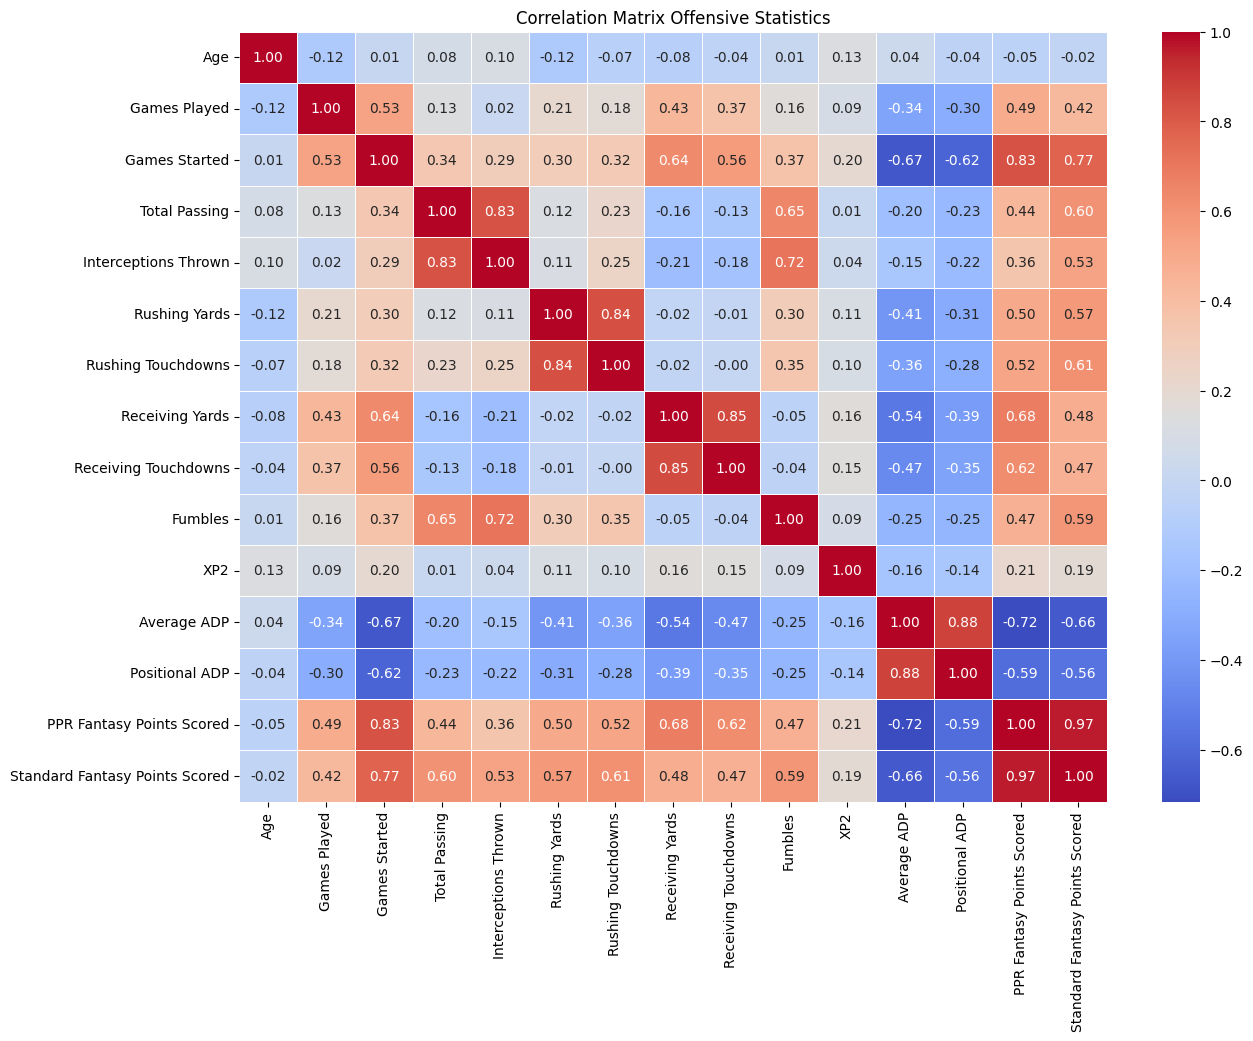

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_columns = [
    "Age", "Games Played", "Games Started",
    'Total Passing',
    "Interceptions Thrown",
    #"Passing Yards", "Passing Touchdowns", 
    "Rushing Yards", "Rushing Touchdowns", "Receiving Yards",
    "Receiving Touchdowns", "Fumbles" , "XP2", "Average ADP", "Positional ADP", "PPR Fantasy Points Scored", "Standard Fantasy Points Scored"
]

correlation_matrix = df_filtered[corr_columns].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Offensive Statistics")
plt.show()


In [4]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


df_kickers = df[df["Position"] == "K"].copy()

vif_columns_kickers = [
    "Age", "Games Played", "Games Started", "Field Goals Attempted 0-39",
    "Field Goals Made 0-39", "Field Goals Attempted 40-49", "Field Goals Made 40-49",
    "Field Goals Attempted 50+", "Field Goals Made 50+", "Field Goals Attempted",
    "Field Goals Made", "Extra Points Attempted", "Extra Points Made",
    "ESPN ADP", "Sleeper ADP", "NFL ADP", "RTSports ADP", "Average ADP", "Positional ADP"
]

df_kickers[vif_columns_kickers] = df_kickers[vif_columns_kickers].fillna(0)

X_kickers = df_kickers[vif_columns_kickers]
X_kickers = sm.add_constant(X_kickers)  

vif_data_kickers = pd.DataFrame()
vif_data_kickers["Feature"] = X_kickers.columns
vif_data_kickers["VIF"] = [variance_inflation_factor(X_kickers.values, i) for i in range(X_kickers.shape[1])]

print(vif_data_kickers)


                        Feature         VIF
0                         const  313.227376
1                           Age    1.705098
2                  Games Played    1.869360
3                 Games Started         NaN
4    Field Goals Attempted 0-39         inf
5         Field Goals Made 0-39         inf
6   Field Goals Attempted 40-49         inf
7        Field Goals Made 40-49         inf
8     Field Goals Attempted 50+         inf
9          Field Goals Made 50+         inf
10        Field Goals Attempted         inf
11             Field Goals Made         inf
12       Extra Points Attempted  713.596869
13            Extra Points Made  717.232818
14                     ESPN ADP    6.016317
15                  Sleeper ADP    2.779596
16                      NFL ADP    2.634107
17                 RTSports ADP    2.769186
18                  Average ADP   59.638128
19               Positional ADP   72.153399


/opt/homebrew/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/homebrew/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [5]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


df_kickers = df[df["Position"] == "K"].copy()

vif_columns_kickers = [
    "Age", "Games Played",
    "Field Goals Made 0-39", "Field Goals Made 40-49", "Field Goals Made 50+", "Extra Points Made", "Average ADP", "Positional ADP"
    
    #"ESPN ADP", "Sleeper ADP", "NFL ADP", "RTSports ADP", "Average ADP", "Positional ADP", "Field Goals Attempted"   

]

df_kickers[vif_columns_kickers] = df_kickers[vif_columns_kickers].fillna(0)

X_kickers = df_kickers[vif_columns_kickers]
X_kickers = sm.add_constant(X_kickers)  

vif_data_kickers = pd.DataFrame()
vif_data_kickers["Feature"] = X_kickers.columns
vif_data_kickers["VIF"] = [variance_inflation_factor(X_kickers.values, i) for i in range(X_kickers.shape[1])]

print(vif_data_kickers)


                  Feature         VIF
0                   const  244.298286
1                     Age    1.528034
2            Games Played    1.571984
3   Field Goals Made 0-39    6.625370
4  Field Goals Made 40-49    3.572810
5    Field Goals Made 50+    3.334639
6       Extra Points Made    6.741314
7             Average ADP   32.569968
8          Positional ADP   27.032665


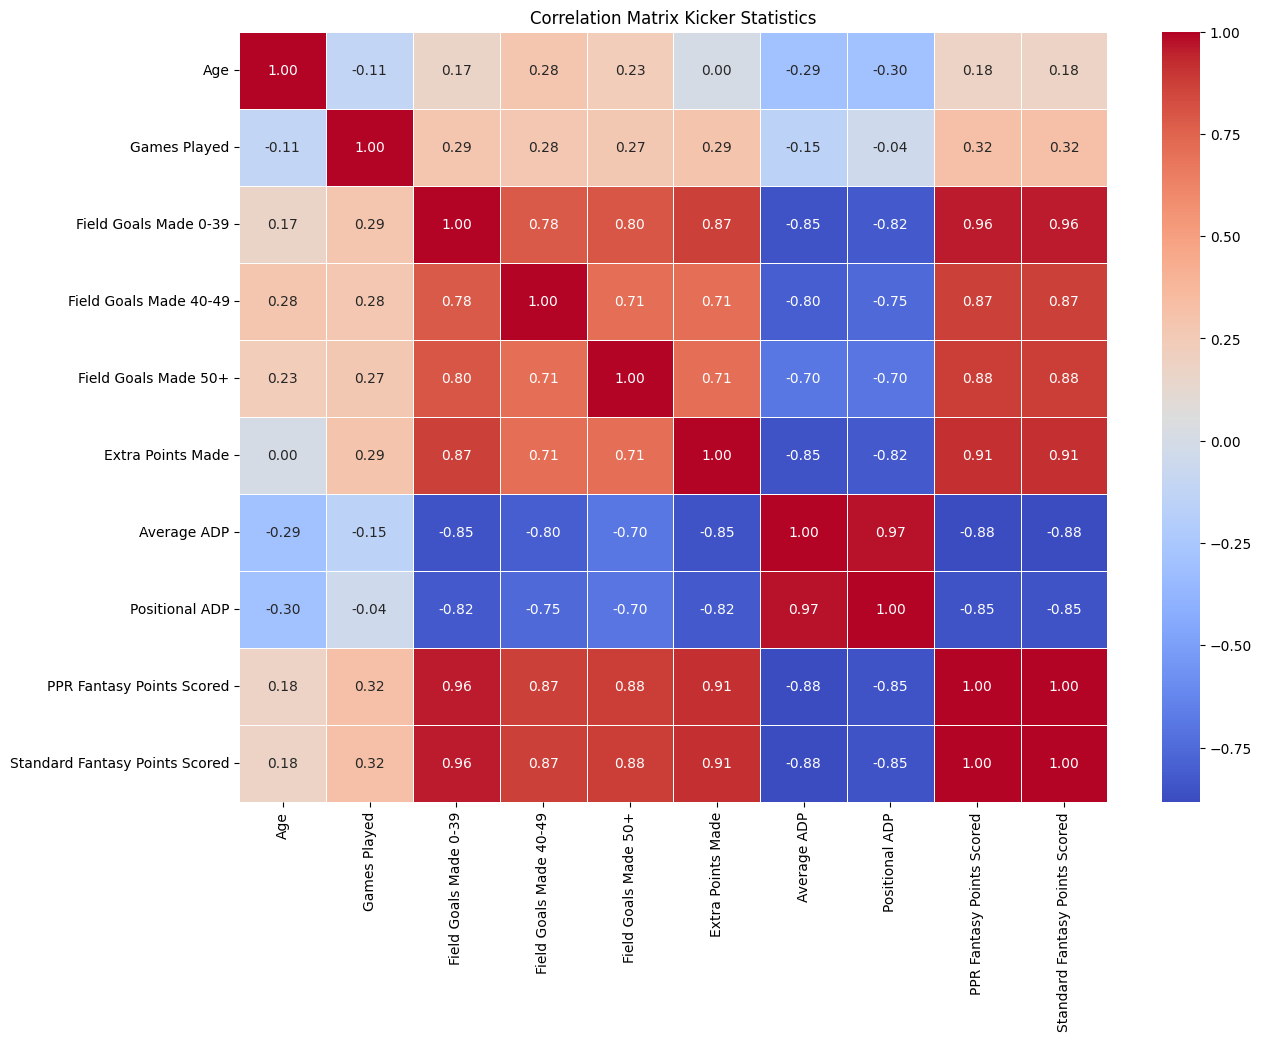

In [6]:
corr_columns_kickers = [
    "Age", "Games Played",
    "Field Goals Made 0-39", "Field Goals Made 40-49", "Field Goals Made 50+", "Extra Points Made", "Average ADP", "Positional ADP", "PPR Fantasy Points Scored", "Standard Fantasy Points Scored"
    
    #"ESPN ADP", "Sleeper ADP", "NFL ADP", "RTSports ADP", "Average ADP", "Positional ADP", "Field Goals Attempted"   

]

correlation_matrix_kickers = df_kickers[corr_columns_kickers].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_kickers, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Kicker Statistics")
plt.show()


In [7]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


df_defense = df[df["Position"] == "DEF"].copy()

vif_columns_defense = [
    "Total Yards Allowed", "Total Plays", "Takeaways", "First Downs Allowed",
    "Passing Yards Allowed", "Passing Touchdowns Allowed", "Rushing Yards Allowed",
    "Rushing Touchdowns Allowed", "Penalties Committed", "Penalty Yards",
    "First Downs by Penalty", "Percent Drives Scored On", "Percent Drives Takeaway",
    "ST_Sacks", "ST_Interceptions", "ST_Fumble Recoveries", "ST_Forced Fumbles",
    "ST_Safeties", "ST_Special Teams Touchdowns", "Fantasy Points From Points",
    "Average ADP", "Positional ADP"
]

df_defense[vif_columns_defense] = df_defense[vif_columns_defense].fillna(0)

X_defense = df_defense[vif_columns_defense]
X_defense = sm.add_constant(X_defense)  

vif_data_defense = pd.DataFrame()
vif_data_defense["Feature"] = X_defense.columns
vif_data_defense["VIF"] = [variance_inflation_factor(X_defense.values, i) for i in range(X_defense.shape[1])]

print(vif_data_defense)


                        Feature          VIF
0                         const  3082.108701
1           Total Yards Allowed          inf
2                   Total Plays     9.707394
3                     Takeaways  1203.732314
4           First Downs Allowed    33.508677
5         Passing Yards Allowed          inf
6    Passing Touchdowns Allowed     3.395649
7         Rushing Yards Allowed          inf
8    Rushing Touchdowns Allowed     6.326853
9           Penalties Committed    13.453846
10                Penalty Yards    13.594631
11       First Downs by Penalty     2.466619
12     Percent Drives Scored On    12.001224
13      Percent Drives Takeaway    42.192504
14                     ST_Sacks     3.390974
15             ST_Interceptions   763.697638
16         ST_Fumble Recoveries   283.034594
17            ST_Forced Fumbles     4.384732
18                  ST_Safeties     5.094673
19  ST_Special Teams Touchdowns     2.591491
20   Fantasy Points From Points          NaN
21        

/opt/homebrew/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [8]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns



df_defense = df[df["Position"] == "DEF"].copy()

vif_columns_defense = [
    "Total Plays", 
    #"First Downs Allowed",
    "Passing Yards Allowed", "Passing Touchdowns Allowed", "Rushing Yards Allowed",
    "Rushing Touchdowns Allowed", 
    #"Penalties Committed", 
    "Penalty Yards",
    "First Downs by Penalty", "Percent Drives Scored On", 
    #"Percent Drives Takeaway",
    "ST_Sacks", "ST_Interceptions", "ST_Fumble Recoveries", "ST_Forced Fumbles",
    "ST_Safeties", "ST_Special Teams Touchdowns", 
    #"Fantasy Points From Points",
    "Average ADP", 
    "Positional ADP"
]

df_defense[vif_columns_defense] = df_defense[vif_columns_defense].fillna(0)

X_defense = df_defense[vif_columns_defense]
X_defense = sm.add_constant(X_defense)  

vif_data_defense = pd.DataFrame()
vif_data_defense["Feature"] = X_defense.columns
vif_data_defense["VIF"] = [variance_inflation_factor(X_defense.values, i) for i in range(X_defense.shape[1])]

print(vif_data_defense)


                        Feature          VIF
0                         const  2095.493929
1                   Total Plays     2.866071
2         Passing Yards Allowed     6.145570
3    Passing Touchdowns Allowed     2.385295
4         Rushing Yards Allowed     4.203911
5    Rushing Touchdowns Allowed     2.517421
6                 Penalty Yards     1.508617
7        First Downs by Penalty     1.940113
8      Percent Drives Scored On     7.747516
9                      ST_Sacks     2.112799
10             ST_Interceptions     2.487943
11         ST_Fumble Recoveries     4.086303
12            ST_Forced Fumbles     3.391578
13                  ST_Safeties     1.890500
14  ST_Special Teams Touchdowns     2.136293
15                  Average ADP    35.920331
16               Positional ADP    34.009380


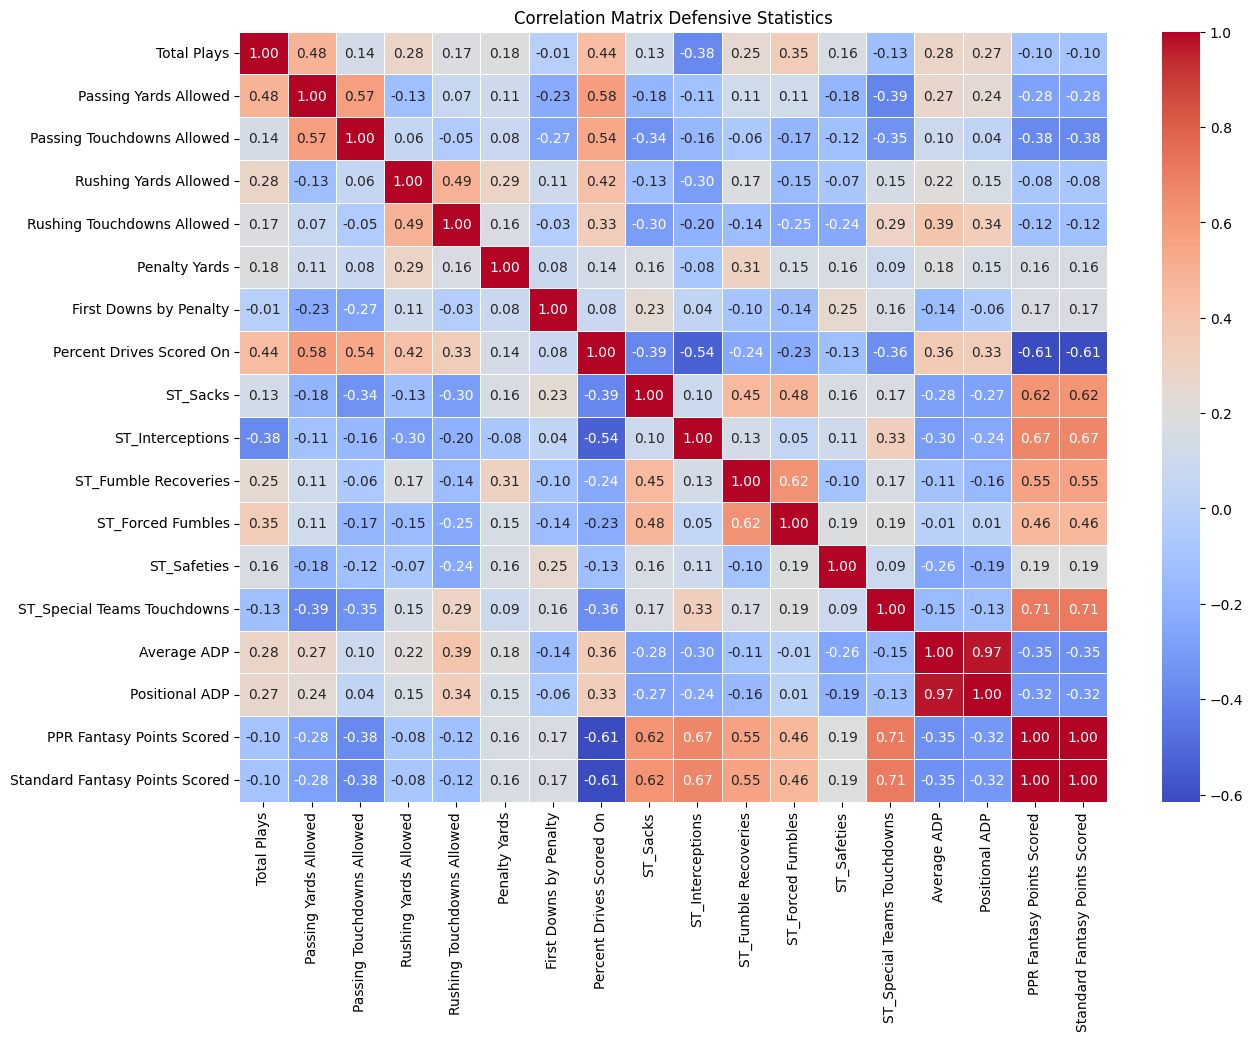

In [9]:
corr_columns_defense = [
    "Total Plays", 
    #"First Downs Allowed",
    "Passing Yards Allowed", "Passing Touchdowns Allowed", "Rushing Yards Allowed",
    "Rushing Touchdowns Allowed", 
    #"Penalties Committed", 
    "Penalty Yards",
    "First Downs by Penalty", "Percent Drives Scored On", 
    #"Percent Drives Takeaway",
    "ST_Sacks", "ST_Interceptions", "ST_Fumble Recoveries", "ST_Forced Fumbles",
    "ST_Safeties", "ST_Special Teams Touchdowns", 
    #"Fantasy Points From Points",
    "Average ADP", 
    "Positional ADP", "PPR Fantasy Points Scored", "Standard Fantasy Points Scored"
]

correlation_matrix_defense = df_defense[corr_columns_defense].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_defense, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Defensive Statistics")
plt.show()


In [10]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

df1 = pd.read_csv("data/2023/2023_finalized_data.csv") 
df1['Total Passing'] = df1['Passing Yards'] * df1['Passing Touchdowns']
df1['touchdowns_allowed'] = df1['Passing Touchdowns Allowed'] + df1['Rushing Touchdowns Allowed']
df1['Receptions*Yards'] = df1['Receptions'] + df1['Receiving Yards']
df1['yards*carries'] = df1['Rushing Yards'] + df1['Rushing Attempts']




df1.drop(columns=["ESPN ADP", "RTSports ADP", "Sleeper ADP", "NFL ADP", "Rushing Attempts", "Field Goals Attempted 0-39", 
                  "Field Goals Attempted 40-49", "Field Goals Made 50+", "Field Goals Attempted 50+", "Extra Points Attempted", 
                  "Total Yards Allowed", "Passing Yards Allowed", "Rushing Yards Allowed", "ST_Fumble Recoveries", 
                  "Fantasy Points From Points", "Percent Drives Takeaway", "First Downs Allowed", "Penalties Committed", "Passing Yards", 
                  "Passing Touchdowns", "Receptions", "Passing Attempts", "Rushing Attempts", "Targets", "Team", "Player Name", "Position", 
                  "Season", "Passing Completions", "PPR Fantasy Points Scored", "Standard Fantasy Points Scored", "Field Goals Made 0-39", 
                  "Field Goals Made 40-49",  "Total Plays", "Percent Drives Scored On", "ST_Forced Fumbles", "Penalty Yards", 
                  "First Downs by Penalty", "ST_Sacks", "Passing Touchdowns Allowed", "Rushing Touchdowns Allowed", "Takeaways", 
                  "Field Goals Attempted", "Receiving Yards", "Rushing Yards"], inplace=True)
df1 = df1.fillna(0)

X = df1
X = sm.add_constant(X)  



vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)




                        Feature        VIF
0                         const  97.656140
1                           Age   4.366335
2                  Games Played   1.527358
3                 Games Started   4.934758
4          Interceptions Thrown   4.543790
5            Rushing Touchdowns   3.664214
6          Receiving Touchdowns   3.780540
7                       Fumbles   2.501273
8              Field Goals Made   7.457342
9             Extra Points Made   7.195979
10             ST_Interceptions   8.647833
11                  ST_Safeties   1.549941
12  ST_Special Teams Touchdowns   3.890204
13                          XP2   1.080469
14                  Average ADP   7.522091
15               Positional ADP   6.050780
16                Total Passing   3.620955
17           touchdowns_allowed   9.109905
18             Receptions*Yards   6.272418
19                yards*carries   4.258001


In [11]:
df1.columns

Index(['Age', 'Games Played', 'Games Started', 'Interceptions Thrown',
       'Rushing Touchdowns', 'Receiving Touchdowns', 'Fumbles',
       'Field Goals Made', 'Extra Points Made', 'ST_Interceptions',
       'ST_Safeties', 'ST_Special Teams Touchdowns', 'XP2', 'Average ADP',
       'Positional ADP', 'Total Passing', 'touchdowns_allowed',
       'Receptions*Yards', 'yards*carries'],
      dtype='object')

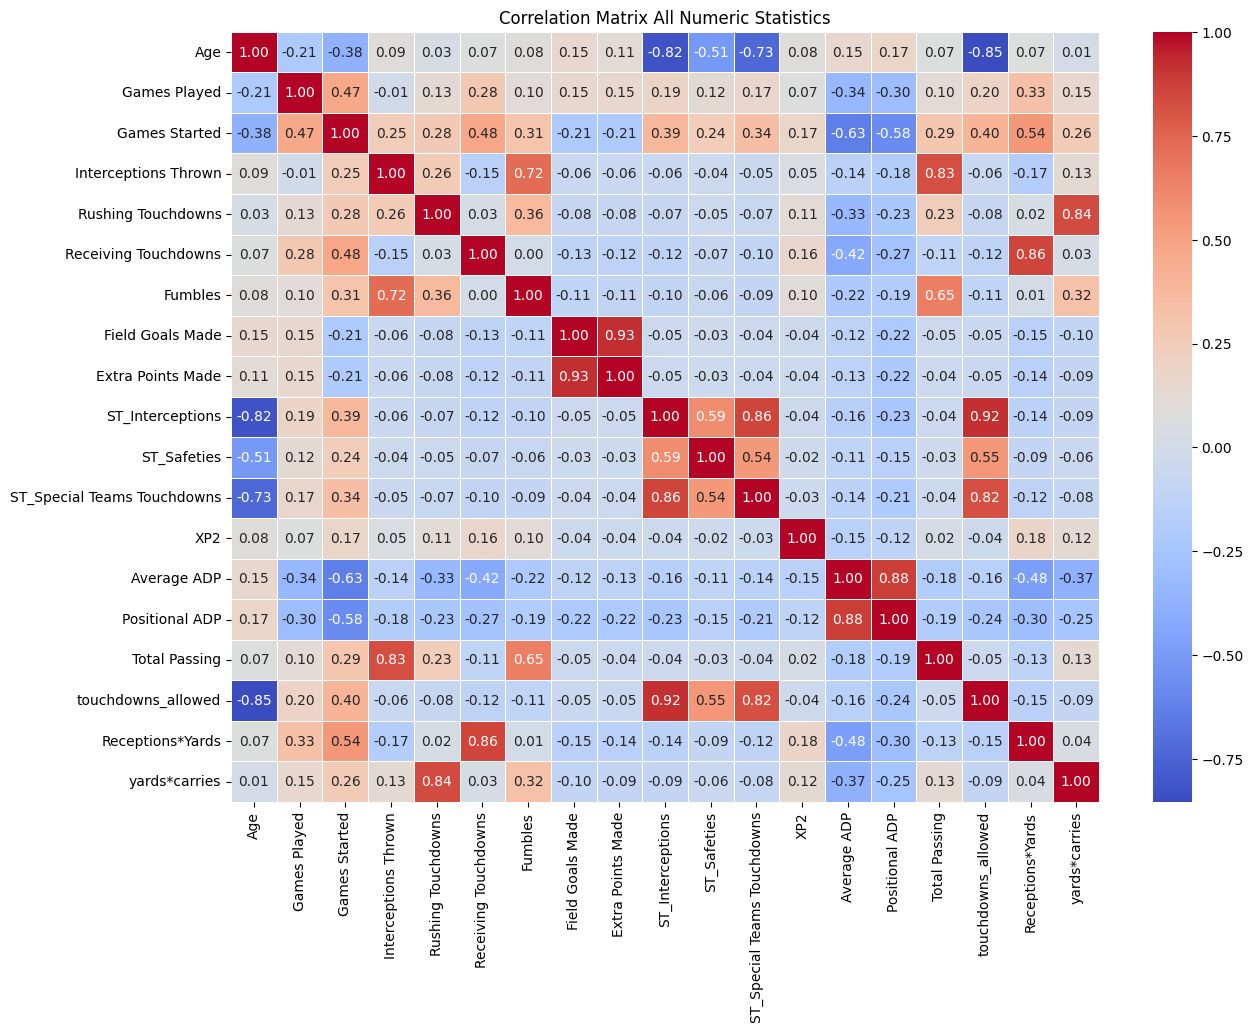

In [12]:
correlation_matrix = df1.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix All Numeric Statistics")
plt.show()
